In [5]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis（EDA）：探索性数据分析

In [67]:
credit = pd.read_csv("/Users/xiyiyan/Desktop/credit.csv")
credit_x = credit.drop(["default.payment.next.month","ID"], axis=1)
credit_y = credit["default.payment.next.month"]

In [68]:
credit_x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,female,university,married,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,female,university,single,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,female,university,single,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,female,university,married,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,male,university,married,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


## 统计量和数据分布

In [69]:
credit_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null object
EDUCATION    30000 non-null object
MARRIAGE     30000 non-null object
AGE          30000 non-null int64
PAY_1        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
dtypes: int64(20), object(3)
memory usage: 5.3+ MB


In [72]:
credit_x.shape

(30000, 23)

In [73]:
credit_x.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

In [74]:
credit_x.describe(include="all") #include参数：默认只输出数值型数据的统计信息, 
                                 #设置参数为'all'则输入的所有列都在输出中,设置为0则只输出离散型变量的统计信息 

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000,30000,30000,30000.000000,30000.0,30000.0,30000.0,30000.0,30000.0,...,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
unique,NaN,2,4,3,NaN,11.0,11.0,11.0,11.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,university,single,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,18112,14030,15964,NaN,14737.0,15730.0,15764.0,16455.0,16947.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,167484.322667,NaN,NaN,NaN,35.485500,NaN,NaN,NaN,NaN,NaN,...,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,NaN,NaN,NaN,9.217904,NaN,NaN,NaN,NaN,NaN,...,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,...,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,...,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,...,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,NaN,NaN,NaN,41.000000,NaN,NaN,NaN,NaN,NaN,...,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000


In [75]:
credit_x["MARRIAGE"].value_counts()

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64

## 数据分布可视化

Text(0, 0.5, 'Counts')

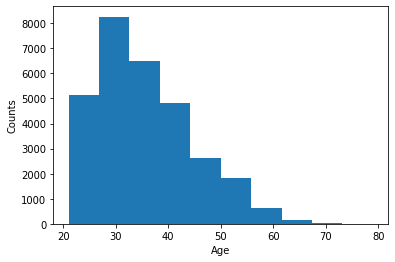

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
#直方图
plt.hist(credit_x["AGE"])
plt.xlabel('Age')
plt.ylabel('Counts')

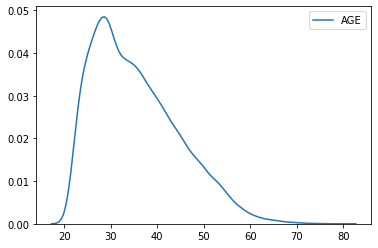

In [77]:
# 密度分布图
sns.kdeplot(credit_x["AGE"])

Text(0.5, 0, 'Education')

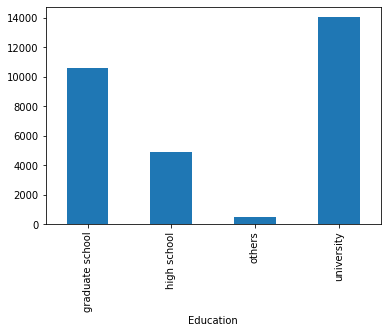

In [79]:
# 离散型变量条形图：各个类别频数分布情况
credit_x["EDUCATION"].value_counts(sort=False).plot(kind="bar")
plt.xlabel('Education')

Text(0.5, 0, 'AGE')

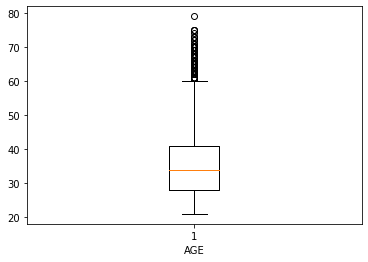

In [80]:
# 箱线图
plt.boxplot(credit_x["AGE"])
plt.xlabel('AGE')

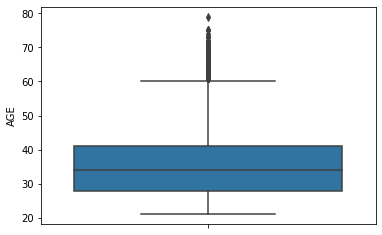

In [81]:
sns.boxplot(y=credit_x["AGE"]) # 也可以用seaborn

## 两特征分析

In [83]:
# pearson相关系数
from scipy.stats import pearsonr
pearsonr(credit_x["LIMIT_BAL"], credit_x["AGE"]) # Returns: 第一个是相关性系数，第二个是p值，p < 0.05时相关系数才有意义

(0.1447127975573359, 4.355914984036994e-140)

In [6]:
from sklearn.datasets import load_boston
x_boston = pd.DataFrame(load_boston().data,columns=load_boston().feature_names)
y_boston = load_boston().target  # 价格

Text(0, 0.5, 'Price')

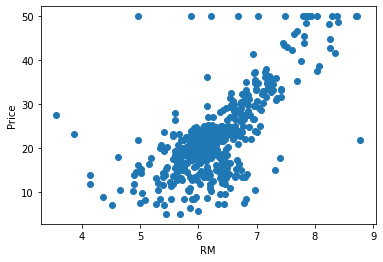

In [9]:
# 可视化
# 连续变量 vs 连续变量
plt.scatter(x_boston["RM"], y_boston) # 每个城镇房子的平均房间数和价格的相关性
plt.xlabel("RM")
plt.ylabel("Price")

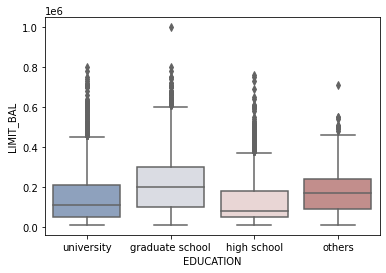

In [88]:
sns.boxplot(x="EDUCATION", y="LIMIT_BAL", data=credit_x, palette="vlag") # 类别型特征和数值型特征

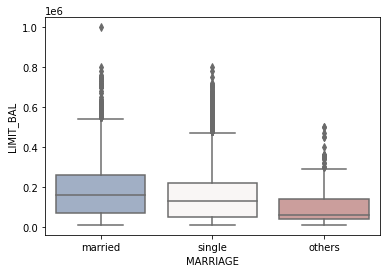

In [89]:
sns.boxplot(x="MARRIAGE", y="LIMIT_BAL", data=credit_x, palette="vlag") 

## 多特征相关性分析

In [90]:
corr_mat = credit_x.corr() # 相关系数矩阵

In [91]:
corr_mat

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.144713,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.144713,1.000000,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
BILL_AMT1,0.285430,0.056239,1.000000,0.951484,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341
BILL_AMT2,0.278314,0.054283,0.951484,1.000000,0.928326,0.892482,0.859778,0.831594,0.280365,0.100851,0.150718,0.147398,0.157957,0.174256
BILL_AMT3,0.283236,0.053710,0.892279,0.928326,1.000000,0.923969,0.883910,0.853320,0.244335,0.316936,0.130011,0.143405,0.179712,0.182326
BILL_AMT4,0.293988,0.051353,0.860272,0.892482,0.923969,1.000000,0.940134,0.900941,0.233012,0.207564,0.300023,0.130191,0.160433,0.177637
BILL_AMT5,0.295562,0.049345,0.829779,0.859778,0.883910,0.940134,1.000000,0.946197,0.217031,0.181246,0.252305,0.293118,0.141574,0.164184
BILL_AMT6,0.290389,0.047613,0.802650,0.831594,0.853320,0.900941,0.946197,1.000000,0.199965,0.172663,0.233770,0.250237,0.307729,0.115494
PAY_AMT1,0.195236,0.026147,0.140277,0.280365,0.244335,0.233012,0.217031,0.199965,1.000000,0.285576,0.252191,0.199558,0.148459,0.185735
PAY_AMT2,0.178408,0.021785,0.099355,0.100851,0.316936,0.207564,0.181246,0.172663,0.285576,1.000000,0.244770,0.180107,0.180908,0.157634


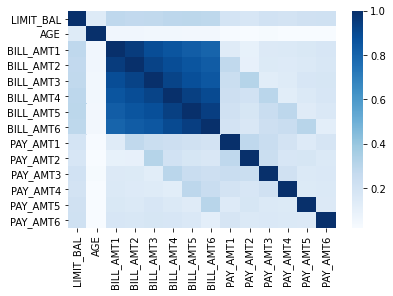

In [92]:
sns.heatmap(corr_mat, cmap="Blues")

# Feature Engineering：特征工程


## 缺失值

In [93]:
df = pd.read_csv("/Users/xiyiyan/Desktop/4.1试讲/data_withNA.csv")
df

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0.0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,NaN,689.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3.0,4.0,50000.0,2.0,2.0,1.0,37.0,NaN,0.0,0.0,...,NaN,NaN,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4.0,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,NaN,9000.0,NaN,679.0,0.0
5,5.0,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,...,19394.0,19619.0,NaN,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,6.0,7.0,500000.0,1.0,1.0,2.0,NaN,0.0,0.0,0.0,...,542653.0,483003.0,NaN,55000.0,40000.0,38000.0,20239.0,13750.0,NaN,0.0
7,7.0,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [94]:
df.isnull().sum() #计算每个变量缺失值的数量

Unnamed: 0                    1
ID                            1
LIMIT_BAL                     1
SEX                           1
EDUCATION                     1
MARRIAGE                      1
AGE                           2
PAY_0                         2
PAY_2                         1
PAY_3                         1
PAY_4                         2
PAY_5                         1
PAY_6                         2
BILL_AMT1                     3
BILL_AMT2                     1
BILL_AMT3                     2
BILL_AMT4                     2
BILL_AMT5                     2
BILL_AMT6                     3
PAY_AMT1                      2
PAY_AMT2                      1
PAY_AMT3                      2
PAY_AMT4                      1
PAY_AMT5                      2
PAY_AMT6                      2
default.payment.next.month    1
dtype: int64

### 缺失值过滤

In [95]:
df.dropna() # 默认删除所有包含缺失值的行
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列 
#参数inplace，为True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认False

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,1.0,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
7,7.0,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9.0,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [96]:
df.dropna(how="all", inplace=True) # 删除所有的值均为NA的行

In [97]:
df

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0.0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,NaN,689.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3.0,4.0,50000.0,2.0,2.0,1.0,37.0,NaN,0.0,0.0,...,NaN,NaN,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4.0,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,NaN,9000.0,NaN,679.0,0.0
5,5.0,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,...,19394.0,19619.0,NaN,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,6.0,7.0,500000.0,1.0,1.0,2.0,NaN,0.0,0.0,0.0,...,542653.0,483003.0,NaN,55000.0,40000.0,38000.0,20239.0,13750.0,NaN,0.0
7,7.0,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9.0,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


In [98]:
df.dropna(how="all",axis=1)  # axis = 1 代表对列进行操作

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,0.0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,...,0.0,0.0,0.0,NaN,689.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,2.0,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,3.0,4.0,50000.0,2.0,2.0,1.0,37.0,NaN,0.0,0.0,...,NaN,NaN,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,4.0,5.0,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,NaN,9000.0,NaN,679.0,0.0
5,5.0,6.0,50000.0,1.0,1.0,2.0,37.0,0.0,0.0,0.0,...,19394.0,19619.0,NaN,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,6.0,7.0,500000.0,1.0,1.0,2.0,NaN,0.0,0.0,0.0,...,542653.0,483003.0,NaN,55000.0,40000.0,38000.0,20239.0,13750.0,NaN,0.0
7,7.0,8.0,100000.0,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
9,9.0,10.0,20000.0,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


### 缺失值补全——sklearn.impute

In [99]:
from sklearn.impute import SimpleImputer 
imputer_mean = SimpleImputer(missing_values=np.nan, strategy="mean") # 用平均值填充
df.loc[:,"AGE"] = imputer_mean.fit_transform(df.loc[:,"AGE"].values.reshape(-1,1))
df.loc[:,"AGE"] # 取整

0    24.000
1    26.000
2    34.000
3    37.000
4    57.000
5    37.000
6    34.125
7    23.000
9    35.000
Name: AGE, dtype: float64

In [100]:
imputer_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent") # 用众数填充
df.loc[:,'PAY_0'] = imputer_mode.fit_transform(df.loc[:,'PAY_0'].values.reshape(-1,1))
df.loc[:,'PAY_0'] 

0    2.0
1   -1.0
2    0.0
3    0.0
4   -1.0
5    0.0
6    0.0
7    0.0
9   -2.0
Name: PAY_0, dtype: float64

### 缺失值补全——pandas

In [101]:
df['BILL_AMT5']

0         0.0
1      3455.0
2     14948.0
3         NaN
4     19146.0
5     19619.0
6    483003.0
7      -159.0
9     13007.0
Name: BILL_AMT5, dtype: float64

In [102]:
df['BILL_AMT5'].fillna(df['BILL_AMT5'].mean()) # 用平均值填充

0         0.000
1      3455.000
2     14948.000
3     69127.375
4     19146.000
5     19619.000
6    483003.000
7      -159.000
9     13007.000
Name: BILL_AMT5, dtype: float64

In [103]:
df['PAY_0']

0    2.0
1   -1.0
2    0.0
3    0.0
4   -1.0
5    0.0
6    0.0
7    0.0
9   -2.0
Name: PAY_0, dtype: float64

In [104]:
df['PAY_0'].fillna(df['PAY_0'].mode()[0]) # 用众数填充

0    2.0
1   -1.0
2    0.0
3    0.0
4   -1.0
5    0.0
6    0.0
7    0.0
9   -2.0
Name: PAY_0, dtype: float64

## 异常值

### 异常值检测——箱线图

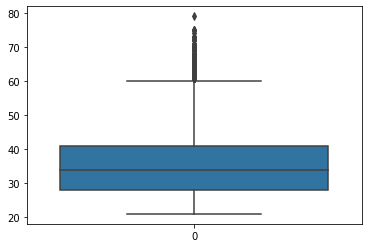

In [105]:
sns.boxplot(data=credit_x["AGE"])

### 异常值处理——RobustScaler

In [106]:
from sklearn.preprocessing import RobustScaler
X = [[ 1., -2.,  2.],  [ -2.,  1.,  3.],  [ 4.,  1., -2.]]
transformer = RobustScaler().fit(X)
transformer  
transformer.transform(X)

array([[ 0. , -2. ,  0. ],
       [-1. ,  0. ,  0.4],
       [ 1. ,  0. , -1.6]])

## 无量纲化

###  Min-max Normalization
当数据(x)按照最小值中心化后，再按极差（最大值 - 最小值）缩放，数据移动了最小值个单位，并且会被收敛到 [0,1]之间，而这个过程，就叫做数据归一化(Normalization，又称Min-Max Scaling)。

In [107]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler() 
scaler = minmax_scaler.fit(credit_x["BILL_AMT2"].values.reshape(-1,1))
x_norm = scaler.fit_transform(credit_x["BILL_AMT2"].values.reshape(-1,1))

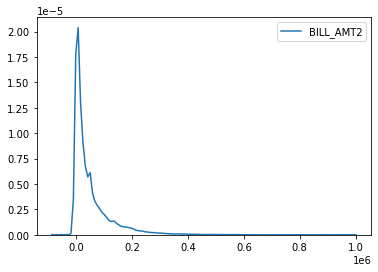

In [108]:
sns.kdeplot(credit_x["BILL_AMT2"])

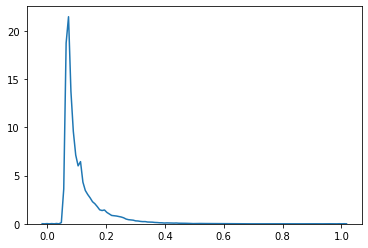

In [109]:
sns.kdeplot(x_norm.flatten())

### Z-score Normalization
当数据(x)按均值(μ)中心化后，再按标准差(σ)缩放，数据就会服从为均值为0，方差为1的分布（不是标准正态分布），而这个过程，就叫做数据标准化(Standardization，又称Z-score normalization)。

In [110]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() 
scaler = std_scaler.fit(credit_x["BILL_AMT2"].values.reshape(-1,1))
x_std = scaler.transform(credit_x["BILL_AMT2"].values.reshape(-1,1))

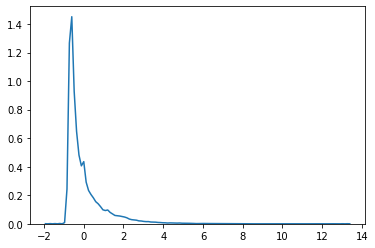

In [111]:
sns.kdeplot(x_std.flatten())

## 分类型特征处理——特征编码

In [112]:
from sklearn import preprocessing 

In [113]:
df["SEX"]

0    2.0
1    2.0
2    2.0
3    2.0
4    1.0
5    1.0
6    1.0
7    2.0
9    1.0
Name: SEX, dtype: float64

In [114]:
onehot = preprocessing.OneHotEncoder()
onehot.fit_transform(np.array(df["SEX"]).reshape(-1,1)).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

## 数值型特征处理——分箱

preprocessing.KBinsDiscretizer：这是将连续型变量划分为分类变量的类，能够将连续型变量排序后按顺序分箱后编码。

In [29]:
df["AGE"].sort_values()

7    23.000
0    24.000
1    26.000
2    34.000
6    34.125
9    35.000
3    37.000
5    37.000
4    57.000
Name: AGE, dtype: float64

In [454]:
 X = np.array(df["AGE"]).reshape(-1,1)
est = preprocessing.KBinsDiscretizer(n_bins=3, encode='ordinal').fit(X)
est.transform(X)

array([[0.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.]])

## 特征选择

### Filter过滤法——方差过滤
feature_selection.VarianceThreshold: 舍弃所有方差小于threshold的特征, 默认舍弃方差为0的特征

In [8]:
from sklearn.feature_selection import VarianceThreshold 
X=[[2,0,1],[2,5,0],[2,0,0],[2,7,1],[2,1,0],[2,6,1]]
pd.DataFrame(X)              

,0,1,2
0,2,0,1
1,2,5,0
2,2,0,0
3,2,7,1
4,2,1,0
5,2,6,1


In [9]:
selector = VarianceThreshold()                      
selector.fit_transform(X)  # 获取删除不合格特征之后的新特征矩阵

array([[0, 1],
       [5, 0],
       [0, 0],
       [7, 1],
       [1, 0],
       [6, 1]])

In [4]:
# Bernoulli随机变量
X=[[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
pd.DataFrame(X)

,0,1,2
0,0,0,1
1,0,1,0
2,1,0,0
3,0,1,1
4,0,1,0
5,0,1,1


In [6]:
#假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除该特征
selector = VarianceThreshold(threshold=(0.8*(1-0.8)))   # 方差：0.8 * （1-0.8）
#返回的结果为选择的特征矩阵
selector.fit_transform(X)

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

### Filter过滤法——卡方过滤

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2

In [6]:
minmax_scaler = MinMaxScaler() 
scaler = minmax_scaler.fit(credit_x)
x_norm = scaler.fit_transform(credit_x) # 由于卡方过滤要求特征值均为非负，所以先作Min-Max Normalization使得取值范围在[0,1]
credit_x_norm = pd.DataFrame(x_norm) 
credit_x_norm.columns = credit_x.columns

In [7]:
# k值的选择：要保留多少个变量？可以通过计算p-value，过滤所有p-value > 0.05的特征
chivalue, pvalues_chi = chi2(credit_x_norm,credit_y)
chivalue.shape[0]-(pvalues_chi>0.05).sum()

14

In [8]:
selector = SelectKBest(chi2, k=14) 
sel_chi = selector.fit_transform(credit_x_norm, credit_y)

In [9]:
indices = selector.get_support(indices=True) 
feature_list = credit_x.columns.tolist()  
feature_select = [feature_list[i] for i in tuple(indices)] 
feature_select   # 输出被选择的变量

['LIMIT_BAL',
 'SEX',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

### Filter过滤法——F检验

In [29]:
from sklearn.feature_selection import f_classif
# k值的选择：要保留多少个变量？可以通过计算p-value，过滤所有p-value > 0.05的特征
fvalue, pvalues_f = f_classif(credit_x,credit_y)
fvalue.shape[0]-(pvalues_f>0.05).sum()

20

In [30]:
selector = SelectKBest(f_classif, k=20) 
sel_f = selector.fit_transform(credit_x, credit_y)  # 过滤之后的特征矩阵

In [85]:
indices = selector.get_support(indices=True) 
feature_list = credit_x.columns.tolist()  
feature_select = [feature_list[i] for i in tuple(indices)] 
feature_select   # 输出被选择的变量

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

### Filter过滤法——互信息法

In [26]:
from sklearn.feature_selection import mutual_info_classif as MIC
mic_result = MIC(credit_x,credit_y)
k = mic_result.shape[0] - sum(mic_result <= 0)

In [37]:
mic_result  # 每个特征与目标之间的互信息量的估计: 这个估计量在[0,1]之间 取值，为0则表示两个变量独立，为1则表示两个变量完全相关

array([0.01855388, 0.0043713 , 0.0076371 , 0.        , 0.00026944,
       0.07322298, 0.0530006 , 0.04165622, 0.02895491, 0.03360746,
       0.02622785, 0.01076681, 0.00530872, 0.0059977 , 0.00267608,
       0.00749523, 0.004812  , 0.02252289, 0.01877413, 0.01960403,
       0.01675162, 0.01396765, 0.01383263])

In [35]:
selector = SelectKBest(MIC, k=22)
sel_mut = selector.fit_transform(credit_x, credit_y)

In [36]:
indices = selector.get_support(indices=True) 
feature_list = credit_x.columns.tolist()  
feature_select = [feature_list[i] for i in tuple(indices)] 
feature_select   # 输出被选择的变量

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

### 特征选择——Wrapper包裹式

In [246]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
selector = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=10) #n_features_to_select是需要的特征的个数

In [247]:
selector.fit(df_x, df_y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=10000,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [248]:
selector.support_ #True代表被选中的特征

array([ True, False, False, False, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False,  True, False, False])

In [249]:
selector.ranking_ #特征的排名

array([ 1,  5, 13, 11, 12,  1,  1,  1,  1,  8,  9, 10,  1,  1,  6, 15,  4,
       14,  1,  1,  3,  1,  2,  7])

### 特征选择——Embedded

In [259]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [260]:
# 基于L1正则化的特征选择
# C是正则化项强度的倒数，默认值是1.0，数值越小表示正则化强度越强
log_selector = SelectFromModel(LogisticRegression(penalty="l1",solver = 'liblinear', C=0.1)).fit(df_x, df_y)

In [258]:
indices = log_selector.get_support(indices=True) 
feature_list = df_x.columns.tolist()  
feature_select = [feature_list[i] for i in tuple(indices)] 
feature_select   # 输出被选择的变量

['SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'PAY_AMT1']

## 降维

### PCA

In [266]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [385]:
pca = PCA(n_components=2) # 从四维降到二维

In [331]:
iris = load_iris()
iris_x = iris.data
iris_y = iris.target
reduced_x = pca.fit_transform(iris_x)

In [332]:
pca.explained_variance_ratio_   # 两个特征已经可以解释97%以上的方差

array([0.92461872, 0.05306648])

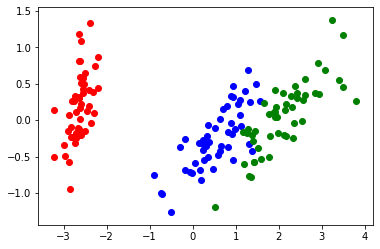

In [335]:
plt.scatter([x[0] for x in reduced_x[0:50]], [x[1] for x in reduced_x[0:50]], c="r")
plt.scatter([x[0] for x in reduced_x[50:100]], [x[1] for x in reduced_x[50:100]], c="b")
plt.scatter([x[0] for x in reduced_x[100:150]], [x[1] for x in reduced_x[100:150]], c="g")

### KPCA

In [338]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_moons

In [378]:
x,y = make_moons(n_samples=100, random_state=1)

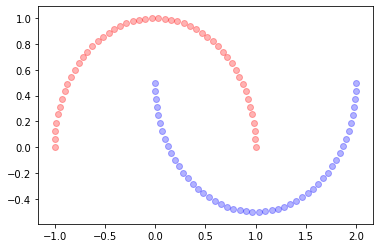

In [379]:
plt.scatter(x[y==0, 0], x[y==0, 1], c="r", alpha=0.3)
plt.scatter(x[y==1, 0], x[y==1, 1], c="b", alpha=0.3) # 原始数据并不线性可分

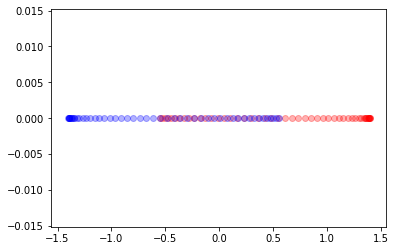

In [386]:
x_pca = pca.fit_transform(x)
plt.scatter(x_pca[y==0, 0], np.zeros(50), c="r", alpha=0.3)
plt.scatter(x_pca[y==1, 0], np.zeros(50), c="b", alpha=0.3) #从二维映射到一维看看

In [387]:
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=2)
x_kpca = kpca.fit_transform(x) # 用kpca降维，这里用到的核函数是RBF，Radial Basis Function
# 从二维转化到无限维，再降回二维，但此时线性可分

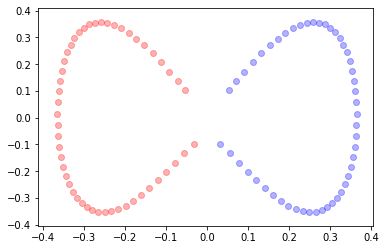

In [388]:
plt.scatter(x_kpca[y==0, 0], x_kpca[y==0, 1], c="r", alpha=0.3)
plt.scatter(x_kpca[y==1, 0], x_kpca[y==1, 1], c="b", alpha=0.3)

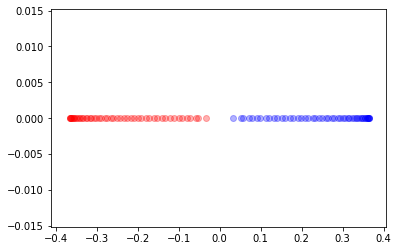

In [389]:
plt.scatter(x_kpca[y==0, 0], np.zeros(50), c="r", alpha=0.3)
plt.scatter(x_kpca[y==1, 0], np.zeros(50), c="b", alpha=0.3) #同样从二维映射到一维看看